# Домашнее задание по статистическому анализу на python

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
%matplotlib inline

**1. Построить нормальное гауссово распределение для двух переменных: x, y. Нарисовать их на плоскости (scatter plot).**

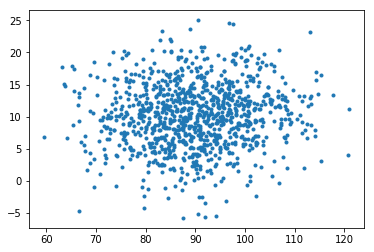

In [4]:
mu1 = 90
sigma1 = 10

mu2 = 10 
sigma2 = 5

amount = 1000

# нормально распределенная случайная величина
norm_rv1 = sts.norm(loc=mu1, scale=sigma1)
norm_rv2 = sts.norm(loc=mu2, scale=sigma2)

# генерируем 1000 значений
x = norm_rv1.rvs(size=amount)
y = norm_rv2.rvs(size=amount)
plt.scatter(x, y, marker='.')

**2. Нарисовать плотность распределения полученной выборки x.**

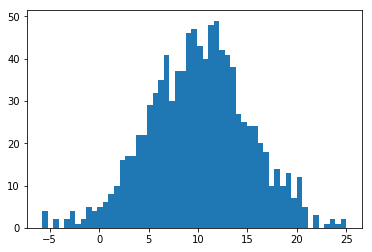

In [5]:
plt.hist(y,55)
plt.show()

**3. Изменить гауссово распределение с помощью матрицы масштабирования Scale = [[n, 0], [0, n]], где n - число, во сколько раз увеличиваем разброс данной выборки. Построить график зависимости (корелляции) x от y.**

In [6]:
# соединяем два вектора x и y в матрицу и транспонируем
X = np.vstack((x, y)).T

# матрица масштабирования
sx, sy = 0.7, 3.4
Scale = np.array([[sx, 0], [0, sy]])

# умножаем матрицу масштабирования на исходную
Y = X.dot(Scale)
print('X')
print(X)
print('-----------')
print('Y')
print(Y)

X
[[90.61589529 16.26750243]
 [78.97799579 10.50941211]
 [96.7501768  15.53688978]
 ...
 [74.05087273 10.0958348 ]
 [95.91403627  6.13763842]
 [91.04821631  8.21480488]]
-----------
Y
[[63.4311267  55.30950827]
 [55.28459705 35.73200117]
 [67.72512376 52.82542524]
 ...
 [51.83561091 34.32583834]
 [67.13982539 20.86797064]
 [63.73375141 27.93033659]]


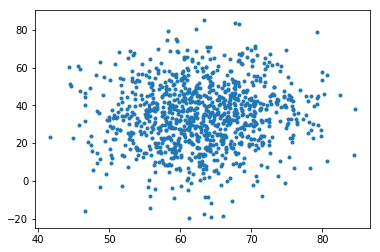

In [7]:
plt.scatter(x*sx, y*sy, marker='.')

**5. Нарисовать плотность распределения полученной выборки x. Сравнить с предыдущим графиком x.**

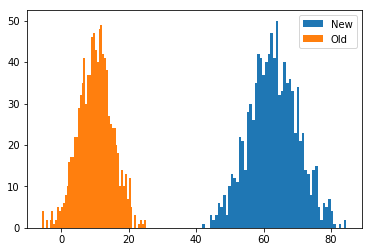

In [8]:
plt.hist(Y.T [0],55)
plt.hist(y,55)
plt.legend(['New', 'Old'])
plt.show()

**6. Посчитать коэффициент Пирсона для переменных x, y. Что означает положительное значение коэффициента? Отрицательное? 0?**

0.06961207086381305


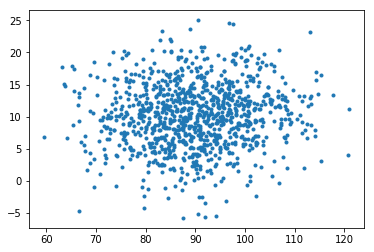

In [9]:
from scipy.stats import pearsonr

corr, p_value = pearsonr(x, y)
plt.scatter(x, y, marker='.')
print(corr)

Коэффициент корреляции Пирсона характеризует существование линейной связи между двумя величинами. 
+1 - прямая линейная связь (чем больше х, тем больше у)
 0 - нет связи
-1 - обратная линейная связь (чем больше х, тем меньше у)

В нашем случае связь практически отсутствует.

**7. Сгенерировать равномерное распределение на отрезке [1, 10]. Нарисовать график плотности распределения. Чем оно отличается от нормального?**

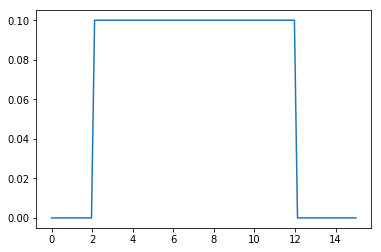

In [19]:
a = 2
b = 12

uniform_rv = sts.uniform(a, b-a)
uniform_rv.rvs(10)

x = np.linspace(0, 15, 100)
pdf = uniform_rv.pdf(x)
plt.plot(x, pdf)

В нормальном распределении есть некоторые более часто встречающиеся значения и они "уплотняются" к центру, т.е. значения в центре более вероятны, чем по краям. А в равномерном - все значения лежат в пределах определенного интервала, причем в пределах этого интервала все значения случайной величины одинаково вероятны.

**8. Найти на графике примеры выброса. Что они означают?**

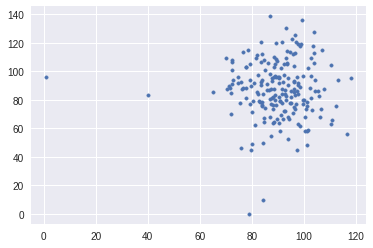

Выбросами являются точки, далеко стоящие от основного массива данных. В данном случае это (0;97) (40;82) (79;0) (85;10). Как правило, это ошибочные данные или очень редкие случаи.

**9.Найти корелляцию в следующих данных:**

In [21]:
import io
import requests
url="http://yustiks.ru/avocado.csv"
df=pd.read_csv(url)
df[:3]

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany


Корелляция между: 4046 - Total number of avocados with PLU 4046 sold  и например Average Price. Если корелляция есть, то скорее всего, данный вид авокадо дорогой по цене и он влияет на среднюю стоимость.

In [26]:
#нормализуем данные
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler(feature_range=(0,1))

np_scaled = min_max_scaler.fit_transform(df[['4046', 'AveragePrice']])
df_norm = pd.DataFrame(np_scaled)
print(df_norm[:10])

          0         1
0  0.000046  0.316726
1  0.000030  0.323843
2  0.000035  0.174377
3  0.000050  0.227758
4  0.000041  0.298932
5  0.000052  0.291815
6  0.000060  0.195730
7  0.000031  0.192171
8  0.000045  0.206406
9  0.000037  0.224199


In [31]:
#Коэффициент корелляции Пирсона
corr, p_value = pearsonr(df_norm[0], df_norm[1])
corr

-0.2083170484878848

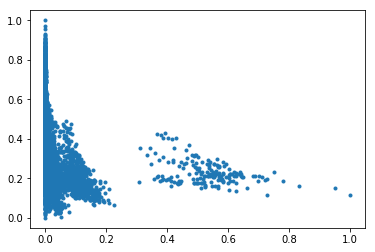

In [29]:
plt.plot(df_norm[0], df_norm[1], '.')

Расчеты показали очень слабую отрицательную корелляцию между количеством продаж определенного вида авокадо (4046) и средней ценой. Гипотеза, о том, что данный вид авокадо влияет на среднюю цену, не подтвердилась.